# Keogh datasets

- e0509m.csv and e0509m_rand_50.csv: ECG dataset with an anomaly (with and without noise)
  - paper [Zotero:WuKeogh2020Current]
  - source: https://wu.renjie.im/research/anomaly-benchmarks-are-flawed/arxiv/#e0509m-dataset
- qtdbSel100MLII.txt: ECG dataset with a single PVC anomaly
  - paper [Zotero:NakamuraEtAl2020MERLIN]
  - source: E-Mail by Eammon

In [51]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from config import data_raw_folder, data_processed_folder
from timeeval import Datasets, DatasetRecord
from timeeval.datasets import DatasetAnalyzer

In [52]:
plt.rcParams["figure.figsize"] = (20, 10)

In [53]:
dataset_collection_name = "Keogh"
source_folder = Path(data_raw_folder) / "Keogh"
target_folder = data_processed_folder

print(f"Looking for source datasets in {Path(source_folder).absolute()} and\nsaving processed datasets in {Path(target_folder).absolute()}")

Looking for source datasets in /home/sebastian/Documents/projects/timeeval/notebooks/data-prep/../../datasets/keogh and
saving processed datasets in /home/sebastian/Documents/projects/timeeval/notebooks/data-prep/../../datasets/data-processed


In [54]:
# shared by all datasets
dataset_type = "real"
input_type = "univariate"
datetime_index = False
split_at = None
train_is_normal = True
train_type = "semi-supervised"

# create target directory
dataset_subfolder = Path(input_type) / dataset_collection_name
target_subfolder = target_folder / dataset_subfolder
target_subfolder.mkdir(parents=True, exist_ok=True)
print(f"Created directories {target_subfolder}")

dm = Datasets(target_folder)

Created directories ../../datasets/data-processed/univariate/Keogh


E0509m datasets

In [55]:
def process_dataset(dm: Datasets, f: Path, train_split: int, anomaly_start: int, anomaly_end: int) -> None:
    dataset_name = f.stem
    test_filename = f"{dataset_name}.test.csv"
    train_filename = f"{dataset_name}.train.csv"
    test_path = dataset_subfolder / test_filename
    train_path = dataset_subfolder / train_filename
    target_test_filepath = target_subfolder / test_filename
    target_train_filepath = target_subfolder / train_filename
    target_meta_filepath = target_test_filepath.parent / f"{dataset_name}.{Datasets.METADATA_FILENAME_PREFIX}"

    # Prepare datasets
    df_test = pd.read_csv(f, header=None, names=["value"])
    df_test.insert(0, "timestamp", df_test.index.values)
    df_test["is_anomaly"] = 0
    df_test.loc[anomaly_start:anomaly_end, "is_anomaly"] = 1
    df_test.to_csv(target_test_filepath, index=False)

    df_train = df_test[:train_split].copy()
    df_train.to_csv(target_train_filepath, index=False)
    print(f"Processed training dataset {f} -> {target_train_filepath}")

    # Prepare metadata
    da = DatasetAnalyzer((dataset_collection_name, dataset_name), is_train=False, df=df_test)
    da.save_to_json(target_meta_filepath, overwrite=True)
    meta = da.metadata

    DatasetAnalyzer((dataset_collection_name, dataset_name), is_train=True, df=df_train)\
        .save_to_json(target_meta_filepath, overwrite=False)

    dm.add_dataset(DatasetRecord(
          collection_name=dataset_collection_name,
          dataset_name=dataset_name,
          train_path=train_path,
          test_path=test_path,
          dataset_type=dataset_type,
          datetime_index=datetime_index,
          split_at=split_at,
          train_type=train_type,
          train_is_normal=train_is_normal,
          input_type=input_type,
          length=meta.length,
          dimensions=meta.dimensions,
          contamination=meta.contamination,
          num_anomalies=meta.num_anomalies,
          min_anomaly_length=meta.anomaly_length.min,
          median_anomaly_length=meta.anomaly_length.median,
          max_anomaly_length=meta.anomaly_length.max,
          mean=meta.mean,
          stddev=meta.stddev,
          trend=meta.trend,
          stationarity=meta.get_stationarity_name(),
    ))
    print(f"Processed source dataset {f} -> {target_test_filepath}")

process_dataset(dm, source_folder / "e0509m.csv", 3000, 8712, 8960)
process_dataset(dm, source_folder / "e0509m_rand_50.csv", 3000, 8712, 8960)
dm.save()
dm.df()

Processed training dataset ../../datasets/keogh/e0509m.csv -> ../../datasets/data-processed/univariate/Keogh/e0509m.train.csv
Processed source dataset ../../datasets/keogh/e0509m.csv -> ../../datasets/data-processed/univariate/Keogh/e0509m.test.csv
Processed training dataset ../../datasets/keogh/e0509m_rand_50.csv -> ../../datasets/data-processed/univariate/Keogh/e0509m_rand_50.train.csv
Processed source dataset ../../datasets/keogh/e0509m_rand_50.csv -> ../../datasets/data-processed/univariate/Keogh/e0509m_rand_50.test.csv


[('Keogh', 'e0509m') (test)] ../../datasets/data-processed/univariate/Keogh/e0509m.metadata.json already exists, but 'overwrite' was specified! Ignoring existing contents.
[('Keogh', 'e0509m_rand_50') (test)] ../../datasets/data-processed/univariate/Keogh/e0509m_rand_50.metadata.json already exists, but 'overwrite' was specified! Ignoring existing contents.


train_path  \
collection_name dataset_name                                                
Keogh           e0509m                  univariate/Keogh/e0509m.train.csv   
                e0509m_rand_50  univariate/Keogh/e0509m_rand_50.train.csv   

                                                               test_path  \
collection_name dataset_name                                               
Keogh           e0509m                  univariate/Keogh/e0509m.test.csv   
                e0509m_rand_50  univariate/Keogh/e0509m_rand_50.test.csv   

                               dataset_type  datetime_index split_at  \
collection_name dataset_name                                           
Keogh           e0509m                 real           False     None   
                e0509m_rand_50         real           False     None   

                                     train_type  train_is_normal  input_type  \
collection_name dataset_name                                                   
Keogh           e0509m          semi-supervised             True  univariate   
                e0509m_rand_50  semi-supervised             True  univariate   

                                length  dimensions  contamination  \
collection_name dataset_name                                        
Keogh           e0509m           15000           1         0.0166   
                e0509m_rand_50   15000           1         0.0166   

                                num_anomalies  min_anomaly_length  \
collection_name dataset_name                                        
Keogh           e0509m                      1                 249   
                e0509m_rand_50              1                 249   

                                median_anomaly_length  max_anomaly_length  \
collection_name dataset_name                                                
Keogh           e0509m                            249                 249   
                e0509m_rand_50                    249                 249   

                                      mean     stddev     trend  \
collection_name dataset_name                                      
Keogh           e0509m         -502.867600  49.152187  no trend   
                e0509m_rand_50 -503.138967  69.589130  no trend   

                                         stationarity  
collection_name dataset_name                           
Keogh           e0509m          difference_stationary  
                e0509m_rand_50  difference_stationary

qtdb Dataset

In [57]:
process_dataset(dm, source_folder / "qtdbSel100MLII.txt", 3000, 13520, 13720)
dm.save()
dm.df()

Processed training dataset ../../datasets/keogh/qtdbSel100MLII.txt -> ../../datasets/data-processed/univariate/Keogh/qtdbSel100MLII.train.csv
Processed source dataset ../../datasets/keogh/qtdbSel100MLII.txt -> ../../datasets/data-processed/univariate/Keogh/qtdbSel100MLII.test.csv


train_path  \
collection_name dataset_name                                                
Keogh           e0509m                  univariate/Keogh/e0509m.train.csv   
                e0509m_rand_50  univariate/Keogh/e0509m_rand_50.train.csv   
                qtdbSel100MLII  univariate/Keogh/qtdbSel100MLII.train.csv   

                                                               test_path  \
collection_name dataset_name                                               
Keogh           e0509m                  univariate/Keogh/e0509m.test.csv   
                e0509m_rand_50  univariate/Keogh/e0509m_rand_50.test.csv   
                qtdbSel100MLII  univariate/Keogh/qtdbSel100MLII.test.csv   

                               dataset_type  datetime_index split_at  \
collection_name dataset_name                                           
Keogh           e0509m                 real           False     None   
                e0509m_rand_50         real           False     None   
                qtdbSel100MLII         real           False     None   

                                     train_type  train_is_normal  input_type  \
collection_name dataset_name                                                   
Keogh           e0509m          semi-supervised             True  univariate   
                e0509m_rand_50  semi-supervised             True  univariate   
                qtdbSel100MLII  semi-supervised             True  univariate   

                                length  dimensions  contamination  \
collection_name dataset_name                                        
Keogh           e0509m           15000           1        0.01660   
                e0509m_rand_50   15000           1        0.01660   
                qtdbSel100MLII   20000           1        0.01005   

                                num_anomalies  min_anomaly_length  \
collection_name dataset_name                                        
Keogh           e0509m                      1                 249   
                e0509m_rand_50              1                 249   
                qtdbSel100MLII              1                 201   

                                median_anomaly_length  max_anomaly_length  \
collection_name dataset_name                                                
Keogh           e0509m                            249                 249   
                e0509m_rand_50                    249                 249   
                qtdbSel100MLII                    201                 201   

                                      mean     stddev     trend  \
collection_name dataset_name                                      
Keogh           e0509m         -502.867600  49.152187  no trend   
                e0509m_rand_50 -503.138967  69.589130  no trend   
                qtdbSel100MLII  -63.901050  36.932954  no trend   

                                         stationarity  
collection_name dataset_name                           
Keogh           e0509m          difference_stationary  
                e0509m_rand_50  difference_stationary  
                qtdbSel100MLII             stationary

## Exploration


### E0509m

- use first 3000 points for training
- use everything for testing
- the anomaly is around 8800

15000 -817 -156


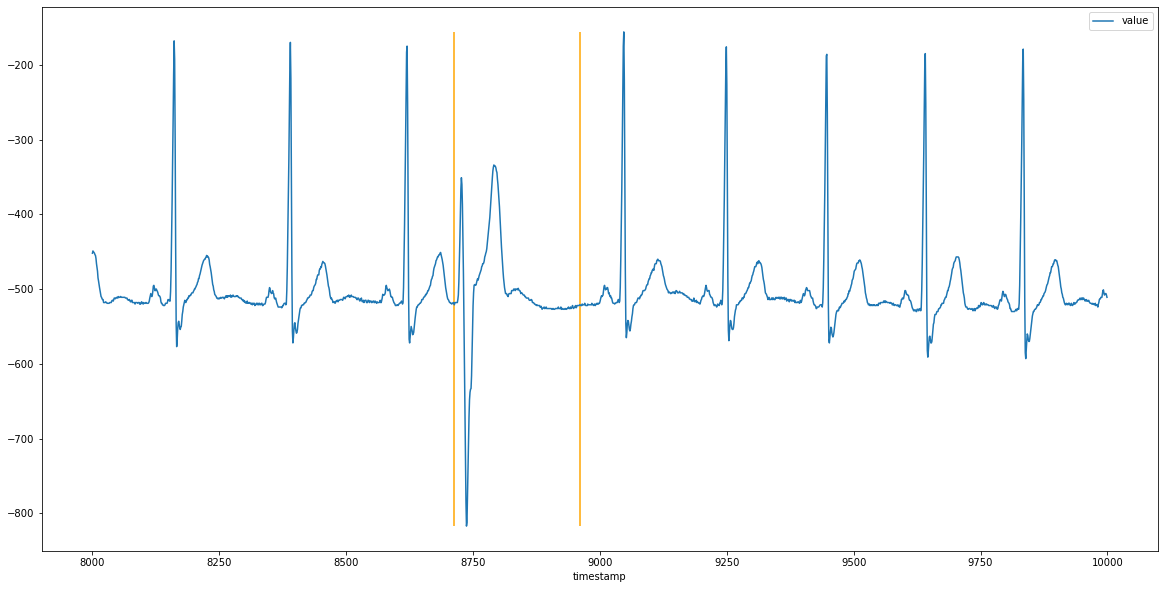

In [38]:
df = pd.read_csv("../../datasets/keogh/e0509m.csv", header=None, names=["value"])
df.index.name = "timestamp"
df.iloc[8000:10000,:].plot()
plt.vlines([8712, 8960], ymin=np.min(df["value"]), ymax=np.max(df["value"]), color="orange")
print(len(df["value"]), np.min(df["value"]), np.max(df["value"]))
plt.show()

### qtdbSel100MLII.txt

- use first 3000 points for training
- use everything for testing
- anomaly around 13700

<AxesSubplot:>

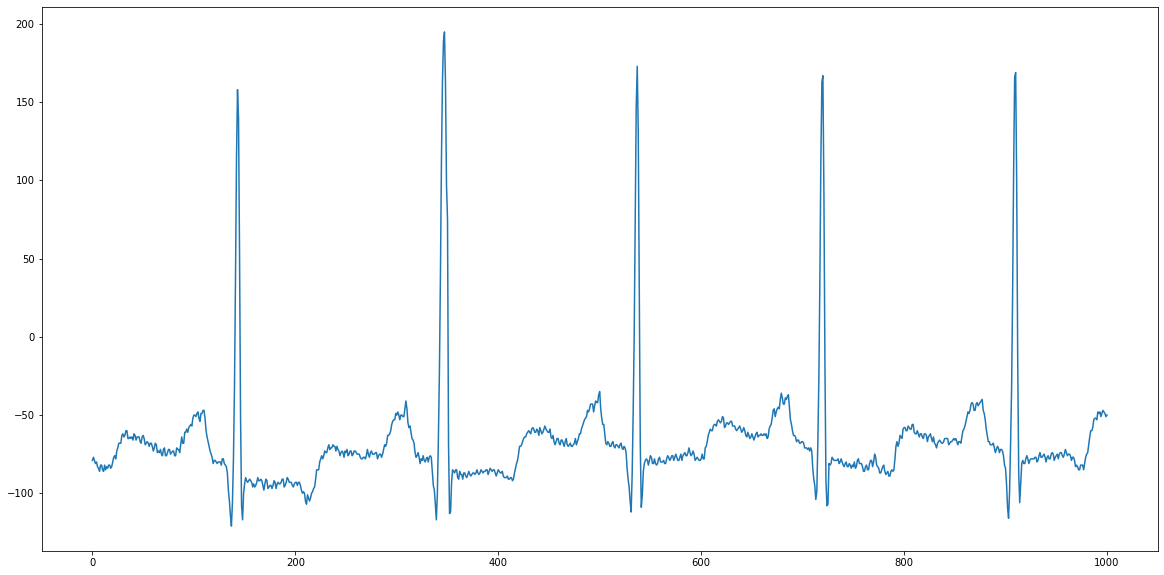

In [32]:
df = pd.read_csv("../../datasets/keogh/qtdbSel100MLII.txt", header=None, names=["value"])
df.insert(0, "timestamp", df.index.values)
df["is_anomaly"] = 0
df.loc[:1000, "value"].plot()

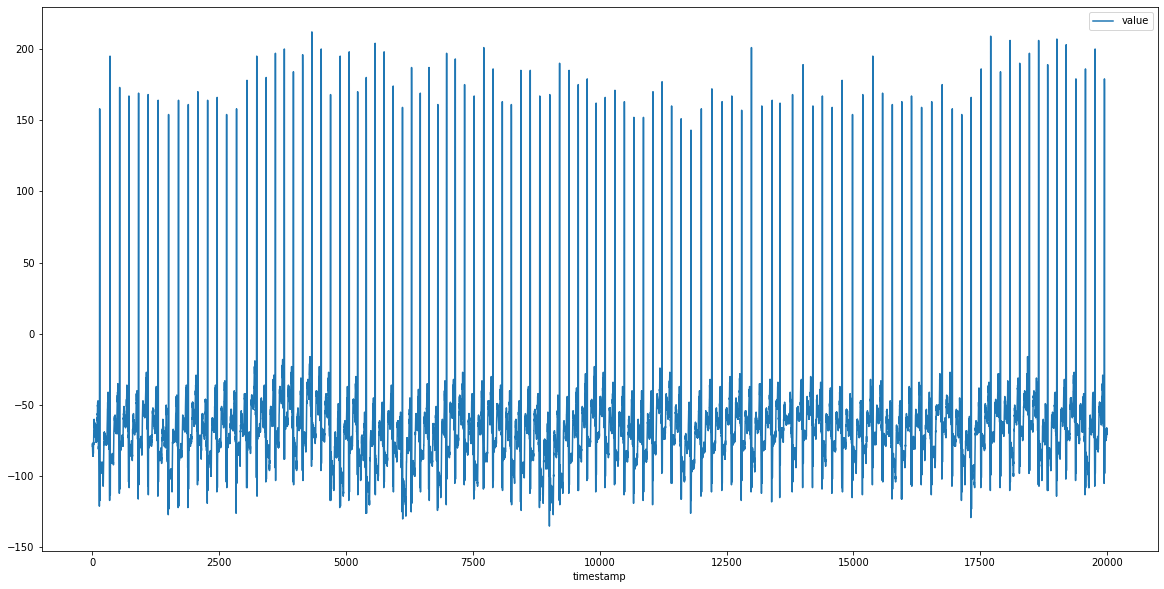

In [45]:
df.plot()
plt.show()

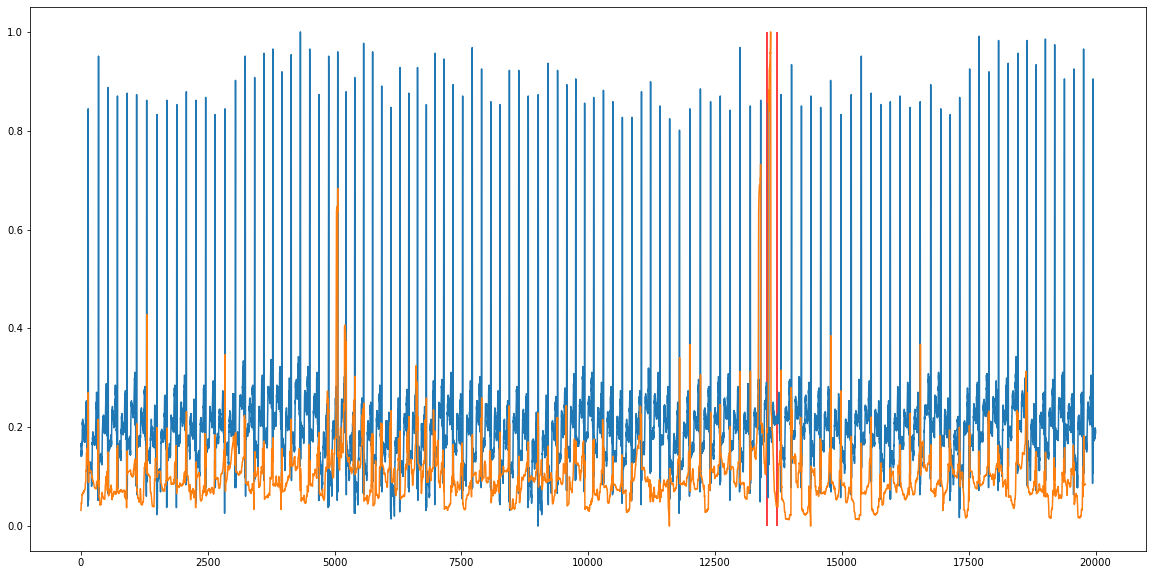

In [50]:
from sklearn.preprocessing import MinMaxScaler

df["score"] = pd.read_csv("../../results/stomp.csv", header=None, names=["score"])["score"]
plt.plot(MinMaxScaler().fit_transform(df["value"].values.reshape(-1, 1)))
plt.plot(MinMaxScaler().fit_transform(df["score"].values.reshape(-1, 1)))
plt.xlim(13000, 14500)
plt.vlines([13520, 13720], ymin=0, ymax=1, color="red")
plt.show()